In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from maze_utils import load_board, plot_board
from maze_utils import exceed_board

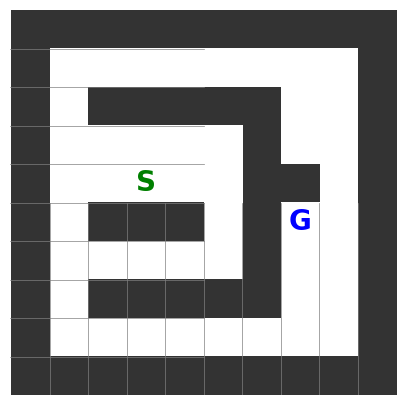

In [2]:
board = load_board('maze/1.png')
XY_WALLS = tuple(zip(*np.where(board==np.inf))) # walls
DIRECTION_MOVES = [(0,1), (0,-1), (-1,0), (1, 0)] # down, up, left, right
XY_STARTING = (4, 3)  # starting node
XY_TARGET = (5, 7)  # target node

fig, ax = plt.subplots(figsize=(5,5))
plot_board(ax, board, None, XY_STARTING, XY_TARGET)

define environment

In [3]:
class Environment:
    def __init__(self, board, possible_directions, xy_start, xy_goal):
        self.board = board
        self.xy_start = xy_start
        self.xy_current = xy_start
        self.xy_goal = xy_goal
        self.possible_directions = possible_directions
    
    def step(self, action):
        done = False
        reward = 0
        
        self.xy_current = (self.xy_current[0]+action[0], self.xy_current[1]+action[1])
        
        if self.xy_current == self.xy_goal:
            reward = 100
            done = True
        
        valid_moves = self.valid_actions(self.xy_current)
        state = (self.xy_current, valid_moves)
        return state, reward, done
    
    def reset(self):
        self.xy_current = self.xy_start
        valid_moves = self.valid_actions(self.xy_current)
        state = (self.xy_current, valid_moves)
        return state
    
    def valid_actions(self, state):
        valid_actions = []
        for action in self.possible_directions:
            xy_new = (state[0] + action[0], state[1] + action[1])
            if not exceed_board(xy_new, self.board.shape) and xy_new not in XY_WALLS:
                valid_actions.append(action)
        return valid_actions
    
    def plot(self):
        plot_board(self.board, self.xy_current, self.xy_goal)

In [16]:
class QAgent:
    def __init__(self, env):
        self.episodes = 100
        self.learning_rate = 0.1
        self.discount_factor = 0.95
        self.epsilon = 1.0
        self.min_epsilon = 0.01
        self.epsilon_decay = 0.999
        self.possible_actions = env.possible_directions
        num_actions = len(self.possible_actions)
        self.Q = np.zeros(env.board.shape + (num_actions, ))
        
    def select_action(self, state, inference=False):
        xy, valid_actions = state
        if np.random.rand() < self.epsilon and not inference:
            # Exploration: select valid move randomly.
            action = random.choice(valid_actions) 
        else:
            # Exploition select the best valid move.
            valid_actions_indices = [self.possible_actions.index(action) for action in valid_actions]
            q_values = np.take(self.Q[xy], valid_actions_indices)
            best_action_index = np.argmax(q_values)
            action = valid_actions[best_action_index]
        return action

    def update_q_value(self, state, action, reward, next_state):
        action_index = self.possible_actions.index(action)
        future_reward = np.max(self.Q[next_state[0]])
        current_q = self.Q[state[0]][action_index]
        self.Q[state[0]][action_index] = current_q + self.learning_rate * (reward + self.discount_factor * future_reward - current_q)

    def decay_epsilon(self):
        self.epsilon = max(self.min_epsilon, self.epsilon * self.epsilon_decay)

In [17]:
env = Environment(board, DIRECTION_MOVES, XY_STARTING, XY_TARGET)
agent = QAgent(env)

In [18]:
scores = []
for episode in range(agent.episodes):
    state = env.reset()  # Reset environment to initial state for each episode
    done = False
    score = 0
    while not done:
        action = agent.select_action(state)  # Choose action based on current policy
        new_state, reward, done = env.step(action)  # Take the action in the environment
        agent.update_q_value(state, action, reward, new_state)  # Update Q-values
        state = new_state  # Move to the next state
        score += reward
    agent.decay_epsilon()
    scores.append(score)
    if (episode+1) % 10 == 0:
        print(f'Episode {episode+1}: {score}')

Episode 10: 100
Episode 20: 100
Episode 30: 100
Episode 40: 100
Episode 50: 100
Episode 60: 100
Episode 70: 100
Episode 80: 100
Episode 90: 100
Episode 100: 100


# Figure

Episode 10: 100
Episode 20: 100
Episode 30: 100
Episode 40: 100
Episode 50: 100
Episode 60: 100
Episode 70: 100
Episode 80: 100
Episode 90: 100
Episode 100: 100


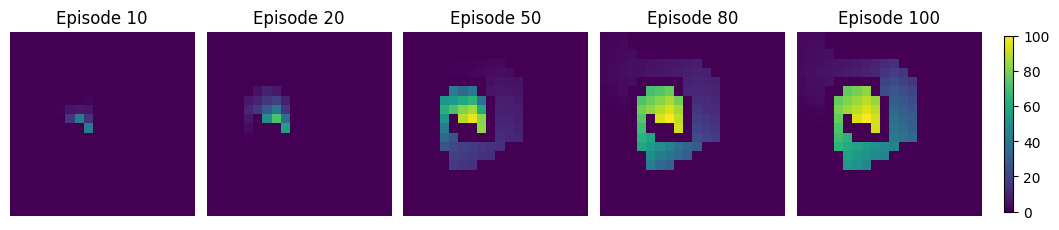

In [19]:
from matplotlib.colors import Normalize
fig, axes = plt.subplots(1, 5, figsize=(12, 12))
norm = Normalize(vmin=0, vmax=100)
plot_indices = [10, 20, 50, 80, 100]
i = 0

env = Environment(board, DIRECTION_MOVES, XY_STARTING, XY_TARGET)
agent = QAgent(env)

scores = []
for episode in range(agent.episodes):
    state = env.reset()  # Reset environment to initial state for each episode
    done = False
    score = 0
    while not done:
        action = agent.select_action(state)  # Choose action based on current policy
        new_state, reward, done = env.step(action)  # Take the action in the environment
        agent.update_q_value(state, action, reward, new_state)  # Update Q-values
        state = new_state  # Move to the next state
        score += reward
    agent.decay_epsilon()
    scores.append(score)
    if (episode+1) % 10 == 0:
        print(f'Episode {episode+1}: {score}')
    
    if episode+1 in plot_indices:
        im = axes[i].imshow(agent.Q.max(axis=2), norm=norm, cmap='viridis')
        axes[i].set_title(f'Episode {episode+1}')
        axes[i].axis('off')
        i = i + 1
plt.tight_layout()
cbar = fig.colorbar(im, ax=axes.ravel().tolist(), orientation='vertical', pad=0.02, shrink=0.15, aspect=20)
plt.show()

# Figure

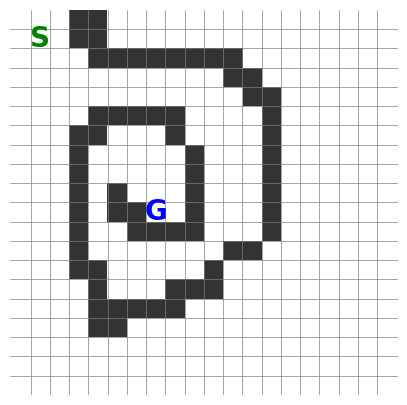

In [20]:
board = load_board('maze/0.png')
XY_WALLS = tuple(zip(*np.where(board==np.inf))) # walls
DIRECTION_MOVES = [(0,1), (0,-1), (-1,0), (1, 0)] # down, up, left, right
XY_STARTING = (1, 1)  # starting node
XY_TARGET = (10, 7)  # target node

fig, ax = plt.subplots(figsize=(5,5))
plot_board(ax, board, None, XY_STARTING, XY_TARGET)

Episode 10: 100
Episode 20: 100
Episode 30: 100
Episode 40: 100
Episode 50: 100
Episode 60: 100
Episode 70: 100
Episode 80: 100
Episode 90: 100
Episode 100: 100


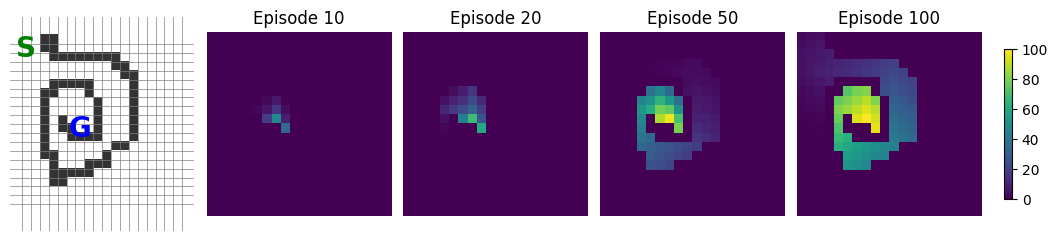

In [21]:
from matplotlib.colors import Normalize
norm = Normalize(vmin=0, vmax=100)
plot_indices = [10, 20, 50, 100]
i = 1
fig, axes = plt.subplots(1, 4+1, figsize=(12, 2.5))
plot_board(axes[0], board, None, XY_STARTING, XY_TARGET)

env = Environment(board, DIRECTION_MOVES, XY_STARTING, XY_TARGET)
agent = QAgent(env)

scores = []
for episode in range(agent.episodes):
    state = env.reset()  # Reset environment to initial state for each episode
    done = False
    score = 0
    while not done:
        action = agent.select_action(state)  # Choose action based on current policy
        new_state, reward, done = env.step(action)  # Take the action in the environment
        agent.update_q_value(state, action, reward, new_state)  # Update Q-values
        state = new_state  # Move to the next state
        score += reward
    agent.decay_epsilon()
    scores.append(score)
    if (episode+1) % 10 == 0:
        print(f'Episode {episode+1}: {score}')
    
    if episode+1 in plot_indices:
        im = axes[i].imshow(agent.Q.max(axis=2), norm=norm, cmap='viridis')
        axes[i].set_title(f'Episode {episode+1}')
        axes[i].axis('off')
        i = i + 1
plt.tight_layout()
cbar = fig.colorbar(im, ax=axes.ravel().tolist(), orientation='vertical', pad=0.02, shrink=0.7, aspect=20)
plt.show()